In [1]:
from mchmm.indep_hmm_initializer.initializer_func import initializer_generator
from mchmm import FullMCHMM

from canada_data import get_macro_data

In [2]:
name_list = ['GDP', 'CPI', 'Emp']
macro_df = get_macro_data(name_list)
data = macro_df.values

<Axes: xlabel='Dates'>

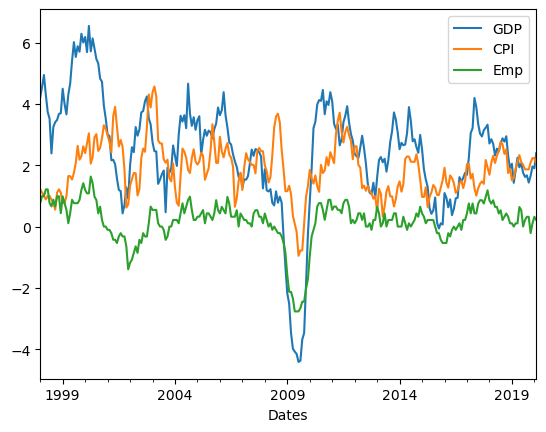

In [3]:
macro_df.plot()

In [4]:
model_dict2 = {}
margin_initializer2, hmm_initializer2, initializer_model2 \
                                = initializer_generator(2, data)
print('Finish fitting initializer...')
for k in range(6):
    print(f"Fitting model with Markov order {k}")
    if k > 0:
        model = FullMCHMM(k=k, num_states=2,
                margin_initializer=margin_initializer2,
                hmm_initializer=hmm_initializer2)
        model.neg_log_likelihood(data)
        model.fit(data, display=True, max_iter=500)
    else:
        model = FullMCHMM(k=1, num_states=2,
                margin_initializer=margin_initializer2,
                hmm_initializer=hmm_initializer2)
        model.neg_log_likelihood(data)
        model.fit(data, serial_correlated=False, display=True, max_iter=500)
    model_dict2[k] = model
    print("-"*60)

c:\Users\Levin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Levin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\Levin\anaconda3\lib\site-packages\autograd\tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
c:\Users\Levin\anaconda3\lib\site-packages\autograd\numpy\numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
c:\Users\Levin\anaconda3\lib\site-packages\autograd\core.py:212: RuntimeWarning: invalid value encountered

Finish fitting initializer...
Fitting model with Markov order 0
Fitting the cross-sectional correlation...
------------------------------------------------------------
Fitting model with Markov order 1
Fitting the within-regime serial dependence...
Fitting the cross-sectional correlation...
Fitting the between-regime serial dependence correlation...
------------------------------------------------------------
Fitting model with Markov order 2
Fitting the within-regime serial dependence...
Fitting the cross-sectional correlation...
Fitting the between-regime serial dependence correlation...
------------------------------------------------------------
Fitting model with Markov order 3
Fitting the within-regime serial dependence...
Fitting the cross-sectional correlation...
Fitting the between-regime serial dependence correlation...
------------------------------------------------------------
Fitting model with Markov order 4
Fitting the within-regime serial dependence...
Fitting the cros

In [5]:
model_dict3 = {}
margin_initializer3, hmm_initializer3, initializer_model3 \
                                = initializer_generator(3, data)
print('Finish fitting initializer...')
for k in range(6):
    print(f"Fitting model with Markov order {k}")
    if k > 0:
        model = FullMCHMM(k=k, num_states=3,
                margin_initializer=margin_initializer3,
                hmm_initializer=hmm_initializer3)
        model.neg_log_likelihood(data)
        model.fit(data, display=True, max_iter=500)
    else:
        model = FullMCHMM(k=1, num_states=3,
                margin_initializer=margin_initializer3,
                hmm_initializer=hmm_initializer3)
        model.neg_log_likelihood(data)
        model.fit(data, serial_correlated=False, display=True, max_iter=500)
    model_dict3[k] = model
    print("-"*60)

c:\Users\Levin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Levin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Finish fitting initializer...
Fitting model with Markov order 0
Fitting the cross-sectional correlation...
------------------------------------------------------------
Fitting model with Markov order 1
Fitting the within-regime serial dependence...
Fitting the cross-sectional correlation...
Fitting the between-regime serial dependence correlation...
------------------------------------------------------------
Fitting model with Markov order 2
Fitting the within-regime serial dependence...
Fitting the cross-sectional correlation...
Fitting the between-regime serial dependence correlation...
------------------------------------------------------------
Fitting model with Markov order 3
Fitting the within-regime serial dependence...
Fitting the cross-sectional correlation...
Fitting the between-regime serial dependence correlation...
------------------------------------------------------------
Fitting model with Markov order 4
Fitting the within-regime serial dependence...
Fitting the cros

In [6]:
from tabulate import tabulate
table_likelihood = [
    ['Markov order'] + [str(i) for i in range(6)],
    [r'2 regimes'] + [model.monitor.loglik for model in list(model_dict2.values())],
    [r'3 regimes'] + [model.monitor.loglik for model in list(model_dict3.values())]
]
table_aic = [
    ['Markov order'] + [str(i) for i in range(6)],
    [r'2 regimes'] + [model.monitor.aic() for model in list(model_dict2.values())],
    [r'3 regimes'] + [model.monitor.aic() for model in list(model_dict3.values())]
]
table_bic = [
    ['Markov order'] + [str(i) for i in range(6)],
    [r'2 regimes'] + [model.monitor.bic() for model in list(model_dict2.values())],
    [r'3 regimes'] + [model.monitor.bic() for model in list(model_dict3.values())]
]

print('Table of likelihood values:')
print(tabulate(table_likelihood[1:], table_likelihood[0], tablefmt="github"))
print('\nTable of AIC values:')
print(tabulate(table_aic[1:], table_aic[0], tablefmt="github"))
print('\nTable of BIC values:')
print(tabulate(table_bic[1:], table_bic[0], tablefmt="github"))

Table of likelihood values:
| Markov order   |        0 |        1 |        2 |        3 |        4 |        5 |
|----------------|----------|----------|----------|----------|----------|----------|
| 2 regimes      | -841.988 | -324.155 | -319.169 | -309.149 | -298.057 | -295.74  |
| 3 regimes      | -735.616 | -342.324 | -337.396 | -327.297 | -315.303 | -311.073 |

Table of AIC values:
| Markov order   |       0 |       1 |       2 |       3 |       4 |       5 |
|----------------|---------|---------|---------|---------|---------|---------|
| 2 regimes      | 1749.98 | 732.311 | 734.338 | 726.299 | 716.114 | 723.48  |
| 3 regimes      | 1577.23 | 814.648 | 822.793 | 820.594 | 814.605 | 824.145 |

Table of BIC values:
| Markov order   |       0 |        1 |        2 |        3 |        4 |        5 |
|----------------|---------|----------|----------|----------|----------|----------|
| 2 regimes      | 1868.23 |  882.817 |  906.345 |  919.807 |  931.124 |  959.991 |
| 3 regimes      | 1

In [35]:
from copy import deepcopy
copy_model = deepcopy(model_dict3[1])

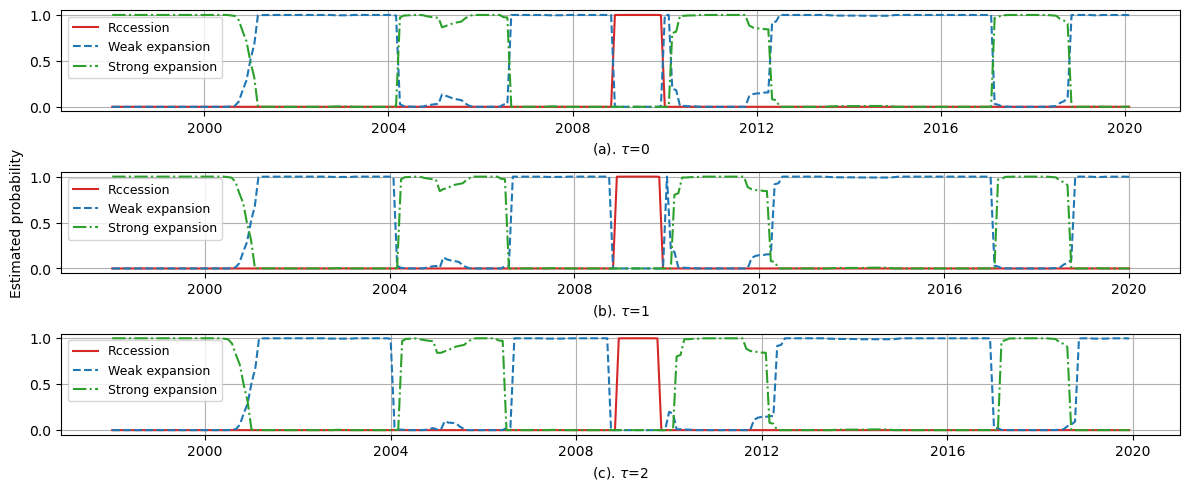

In [81]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib as mpl

r = 2
date_index = macro_df.index.to_timestamp()
model = model_dict3[4]

labels = ['Rccession', 'Weak expansion', 'Strong expansion']
colors = ['tab:red', 'tab:blue', 'tab:green']
linestyle = ['-', "--", "-."]
fig, axs = plt.subplots(nrows=3, figsize=(12,5))
for r in [0,1,2]:
    p1 = model.inference_module.smooth_predict(1)[:,r]
    p2 = model.inference_module.smooth_predict(2)[:,r,r]
    p3 = model.inference_module.smooth_predict(3)[:,r,r,r]
    
    line0 = axs[0].plot(date_index, p1, label=labels[r], linestyle=linestyle[r], color=colors[r])
    line1 = axs[1].plot(date_index[:-1], p2, label=labels[r], linestyle=linestyle[r],color=colors[r])
    line2 = axs[2].plot(date_index[:-2], p3, label=labels[r], linestyle=linestyle[r],color=colors[r])

axs[1].set_ylabel('Estimated probability')
for i, ax in enumerate(axs): 
    ax.grid()
    ax.set_xlabel(f'({chr(97+i)}). ' + r'$\tau$' + f'={i}')
    ax.legend(loc=2, fontsize=9)
fig.tight_layout()
fig.savefig('simulation_plots/canada_smooth_plot.pdf')

In [82]:
variables_of_model3 = model_dict3[4].variables
%store variables_of_model3

Stored 'variables_of_model3' (list)


In [6]:
%store -r variables_of_model3
model = FullMCHMM(k=4, num_states=3)
model = model.get_model_from_seperate_parameters(*variables_of_model3)
model.inference_module = model.get_inference_module(data)

In [70]:
chr(97+i)

'a'